# Stage-1:  Business Problem Understanding

DREAM HOUSING FINANCE COMPANY

Customers first apply for home loan and company then Validates the customer eligibility. They want to automate the loan eligibility process based on customer details provided while filling the form online..

To identify the customers that are eligible for loan amount so that The Dream Housing Finance Company can target these customers.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [36]:
pwd

'/Users/sadafhussain/Desktop/Data Science by SRK NareshIT'

In [2]:
data=pd.read_csv("LoanData.csv")

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Stage-2: Data Understanding

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data['Loan_ID'].nunique()        #all 614 unique id's which are not needed for analysis
                                 #dropping the column

614

### Feature selection- drop unimportant 


In [8]:
data.drop(columns=['Loan_ID'], inplace= True)

In [9]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [10]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

### Create new columns and drop some as per requirement

In [14]:
data['Income']= data['ApplicantIncome']+ data['CoapplicantIncome']

In [15]:
data.drop(columns=['ApplicantIncome','CoapplicantIncome'], inplace= True)

In [16]:
data['Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            601 non-null    object 
 1   Married           611 non-null    object 
 2   Dependents        599 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     582 non-null    object 
 5   LoanAmount        592 non-null    float64
 6   Loan_Amount_Term  600 non-null    float64
 7   Credit_History    564 non-null    float64
 8   Property_Area     614 non-null    object 
 9   Loan_Status       614 non-null    object 
 10  Income            614 non-null    float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


### replacing values or decoding from binary to alphabetical

In [18]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [19]:
data['Credit_History']= data['Credit_History'].replace({1:"Good", 0:"Bad"})

In [20]:
data['Credit_History'].unique()

array(['Good', 'Bad', nan], dtype=object)

In [22]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [24]:
data.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History       object
Property_Area        object
Loan_Status          object
Income              float64
dtype: object

In [23]:
continous=['LoanAmount', 'Income']

discrete_categorical=['Gender', 'Married', 'Education', 'Self_Employed', 
                      'Credit_History', 'Property_Area', 'Loan_Status']

discrete_count=['Dependents', 'Loan_Amount_Term']

### Exploratory Data Analysis (EDA)

In [25]:
data[continous].describe()

,LoanAmount,Income
count,592.000000,614.000000
mean,146.412162,7024.705081
std,85.587325,6458.663872
min,9.000000,1442.000000
25%,100.000000,4166.000000
50%,128.000000,5416.500000
75%,168.000000,7521.750000
max,700.000000,81000.000000


In [26]:
data[discrete_categorical].describe()

#we find the missong values in few columns

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,Good,Semiurban,Y
freq,489,398,480,500,475,233,422


In [28]:
data[discrete_count].describe()

,Loan_Amount_Term
count,600.00000
mean,342.00000
std,65.12041
min,12.00000
25%,360.00000
50%,360.00000
75%,360.00000
max,480.00000


For continous variables

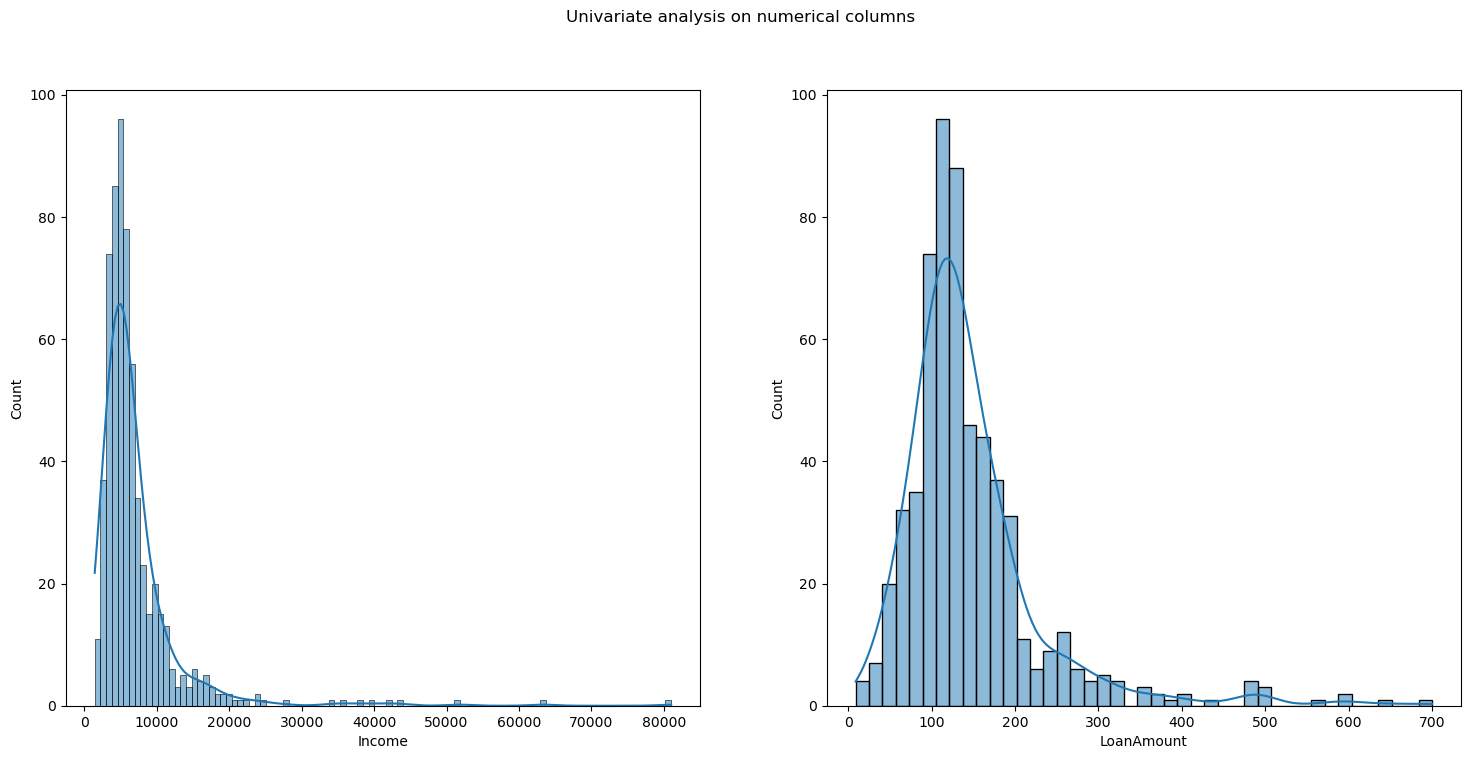

In [33]:
plt.rcParams['figure.figsize']=(18,8)   #runtime configuration parameters- to control the appearance of plots

plt.subplot(1,2,1)    #1: The total number of rows in the grid.
                      #2: The total number of columns in the grid.
                      #1: The index of the current subplot in the grid.
        
sns.histplot(data['Income'],kde=True)  #Kernel Density estimation to smooth out the distribution of data points.

plt.subplot(1,2,2)
sns.histplot(data['LoanAmount'],kde=True)

plt.suptitle('Univariate analysis on numerical columns')    #subtitle does not work
plt.show()

In [34]:
data[continous].skew()     #highly right skewed

LoanAmount    2.677552
Income        5.633449
dtype: float64

In [37]:
data[continous].corr()

,LoanAmount,Income
LoanAmount,1.000000,0.624621
Income,0.624621,1.000000


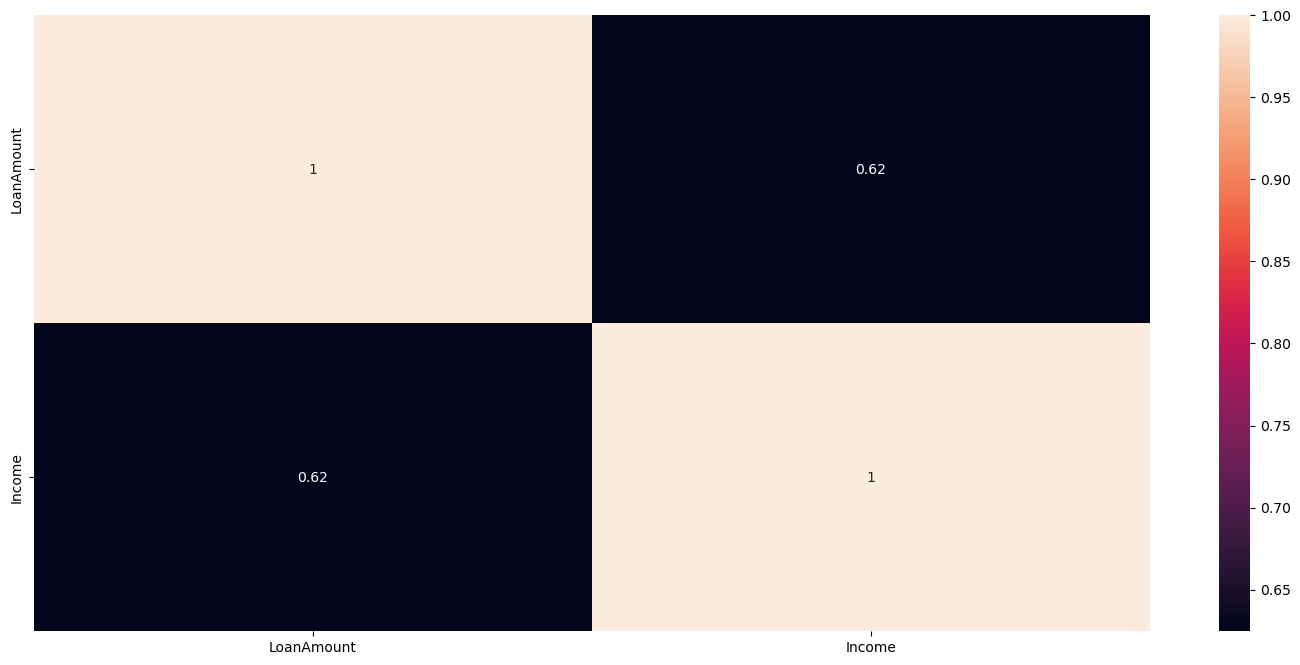

In [39]:
sns.heatmap(data[continous].corr(), annot=True)
plt.show()

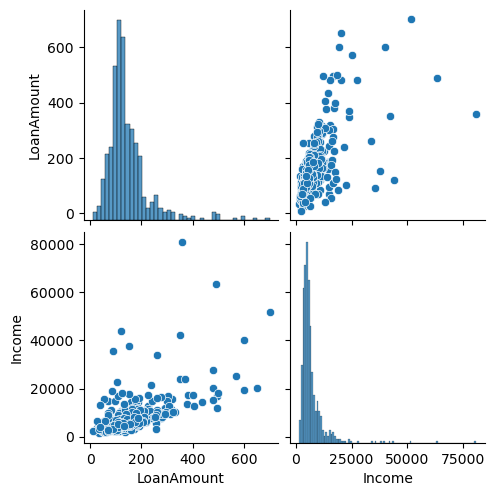

In [40]:
sns.pairplot(data[continous])

For Discrete variables

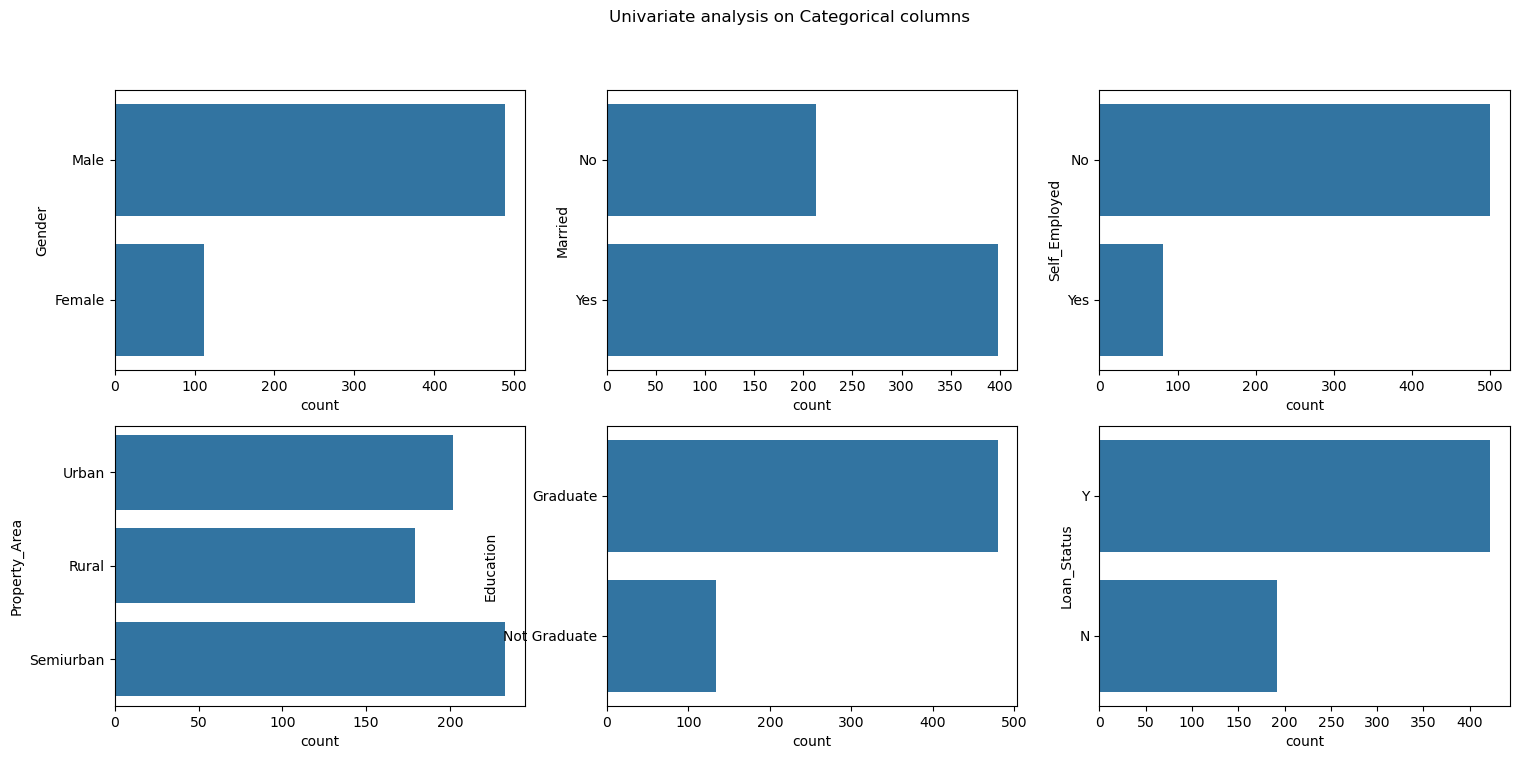

In [41]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2,3,1)
sns.countplot(data['Gender'])

plt.subplot(2,3,2)
sns.countplot(data['Married'])

plt.subplot(2,3,3)
sns.countplot(data['Self_Employed'])

plt.subplot(2,3,4)
sns.countplot(data['Property_Area'])

plt.subplot(2,3,5)
sns.countplot(data['Education'])

plt.subplot(2,3,6)
sns.countplot(data['Loan_Status'])

plt.suptitle('Univariate analysis on Categorical columns')    
plt.show()

Let's compare all categories with respect to loan status:

In [42]:
print("Impact of Marriage on Loan Status:")
print(pd.crosstab(data['Loan_Status'], data['Married']))
print('\n')

print("Impact of Dependents on Loan Status:")
print(pd.crosstab(data['Loan_Status'], data['Dependents']))
print('\n')

print("Impact of Education on Loan Status:")
print(pd.crosstab(data['Loan_Status'], data['Education']))
print('\n')

print("Impact of Employment on Loan Status:")
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))
print('\n')

print("Impact of Property on Loan Status:")
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))
print('\n')

print("Impact of credit on Loan Status:")
print(pd.crosstab(data['Loan_Status'], data['Credit_History']))
print('\n')
 

Impact of Marriage on Loan Status:
Married       No  Yes
Loan_Status          
N             79  113
Y            134  285


Impact of Dependents on Loan Status:
Dependents     0   1   2  3+
Loan_Status                 
N            107  36  25  18
Y            238  66  76  33


Impact of Education on Loan Status:
Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82


Impact of Employment on Loan Status:
Self_Employed   No  Yes
Loan_Status            
N              157   26
Y              343   56


Impact of Property on Loan Status:
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 69         54     69
Y                110        179    133


Impact of credit on Loan Status:
Credit_History  Bad  Good
Loan_Status              
N                82    97
Y                 7   378




#### Check for missing values

In [43]:
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

#### Check for skewness

In [44]:
data[continous].skew()     #highly right skewed

LoanAmount    2.677552
Income        5.633449
dtype: float64

#### Check outliers

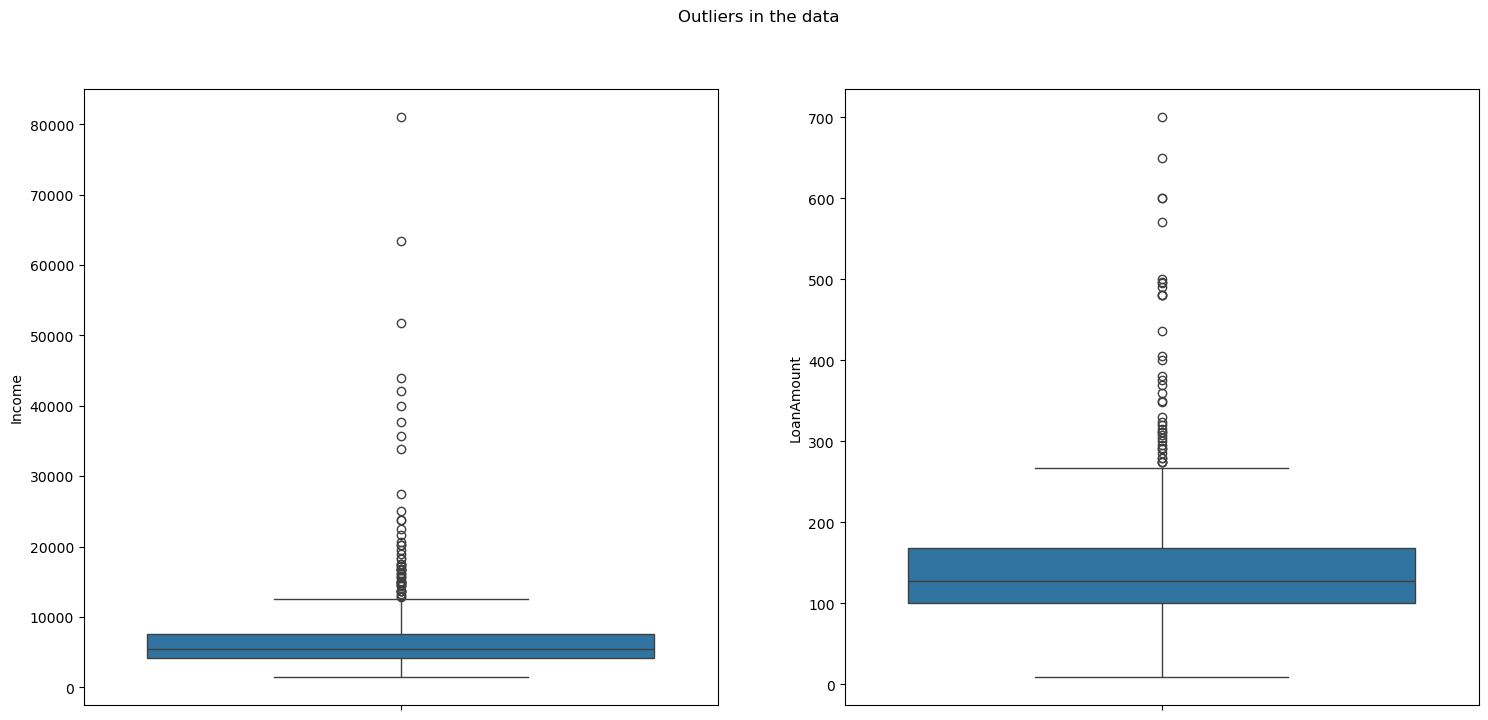

In [45]:
#visualizing using boxplot

plt.subplot(1,2,1)
sns.boxplot(data['Income'])

plt.subplot(1,2,2)
sns.boxplot(data['LoanAmount'])

plt.suptitle("Outliers in the data")
plt.show()

# Stage-3: Data Preparation

1. Data Cleaning: 

     Wrong Data
     
     Missing values
     
     Wrong data type
     
     Duplicates
     
     Outliers
     
     
2. Data Wrangling:

     Transformation(for continous)
     
     Scaling(for continous)
     
     Encoding(for discrete categorical)
     
     ** No data wrangling on count variable

#### Wrong data treatment

In [46]:
data['Dependents']=data['Dependents'].replace({'3+':3})

#### Missing values treatment

In [47]:
data['Dependents']=data['Dependents'].fillna(0)

data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

data= data.dropna(subset=['Income', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])  #since these are 
                                                                                          #important, so we 
                                                                                          #cannot assume.

In [48]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

#### Data type conversion

In [49]:
data['Dependents']= data['Dependents'].astype('int')
data['Loan_Amount_Term']= data['Loan_Amount_Term'].astype('int')

#### Outliers treatment

In [ ]:
# outliers will be retrained, since some people do have high income.

#### Encoding (for ML)

In [50]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,128.0,360,Good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360,Good,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360,Good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360,Good,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360,Good,Urban,Y,9613.0


In [51]:
# alphabetical wise 0 for which ever comes first and 1 for latter.

data['Gender']= data['Gender'].replace({'Male': 1, 'Female':0})
data['Married']= data['Married'].replace({'Yes': 1, 'No':0})
data['Education']= data['Education'].replace({'Not Graduate': 1, 'Graduate':0})
data['Self_Employed']= data['Self_Employed'].replace({'Yes': 1, 'No':0})
data['Property_Area']= data['Property_Area'].replace({'Urban': 2, 'Semiurban': 1, 'Rural':0})
data['Credit_History']= data['Credit_History'].replace({'Good': 1, 'Bad':0})
data['Loan_Status']= data['Loan_Status'].replace({'Y': 1, 'N':0})


In [52]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,0,0,128.0,360,1,0,0,6091.0
2,1,1,0,0,1,66.0,360,1,2,1,3000.0
3,1,1,0,1,0,120.0,360,1,2,1,4941.0
4,1,0,0,0,0,141.0,360,1,2,1,6000.0
5,1,1,2,0,1,267.0,360,1,2,1,9613.0


#### Transformations

In [53]:
from scipy.stats import boxcox

In [54]:
data['Income'], a= boxcox(data['Income'])
data['LoanAmount'], c= boxcox(data['LoanAmount'])

In [55]:
data['Loan_Amount_Term']= data['Loan_Amount_Term']/12

In [56]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,0,0,6.243267,30.0,1,0,0,1.864967
2,1,1,0,0,1,5.202610,30.0,1,2,1,1.856556
3,1,1,0,1,0,6.138816,30.0,1,2,1,1.862802
4,1,0,0,0,0,6.401083,30.0,1,2,1,1.864819
5,1,1,2,0,1,7.481930,30.0,1,2,1,1.868932


#### X&y

In [57]:
X=data.drop('Loan_Status', axis=1)
y=data['Loan_Status']

In [59]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
1,1,1,1,0,0,6.243267,30.0,1,0,1.864967
2,1,1,0,0,1,5.202610,30.0,1,2,1.856556
3,1,1,0,1,0,6.138816,30.0,1,2,1.862802
4,1,0,0,0,0,6.401083,30.0,1,2,1.864819
5,1,1,2,0,1,7.481930,30.0,1,2,1.868932


In [60]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

#### train-test split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=70)

In [63]:
# Machine learning models are often sensitive to the data they train on, especially in smaller datasets. 
# By setting a random_state, you ensure that you get the same split every timeyou run your code.
# 1. Ensuring consistent results
# 2. Allowing fair comparison across different models, as each model will train on the exact same training data 
# and evaluate on the exact same test data.

# Stage-4: Modelling and Evaluation

In [65]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/0e/57/900d6efd517aea09de07a22f26ec3bb757f744b96d098a24aa383d47cfb9/xgboost-2.1.2-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# 1. Logistic Regression

In [67]:
#Modelling

log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [89]:
#Predict and evaluate on train data

ypred_train=log_model.predict(X_train)   #default threshold value is 0.5
print("Train Accuracy: ", accuracy_score(y_train,ypred_train))

#cross validation on train data

print("CV Score: ", cross_val_score(log_model, X_train, y_train, cv=6, scoring="accuracy").mean())

# Predict and evaluation on test data

ypred_test= log_model.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

Train Accuracy:  0.8085106382978723
CV Score:  0.8060697518443997
Test Accuracy:  0.839622641509434


In [90]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

[[14 16]
 [ 1 75]]
              precision    recall  f1-score   support

           0       0.93      0.47      0.62        30
           1       0.82      0.99      0.90        76

    accuracy                           0.84       106
   macro avg       0.88      0.73      0.76       106
weighted avg       0.86      0.84      0.82       106



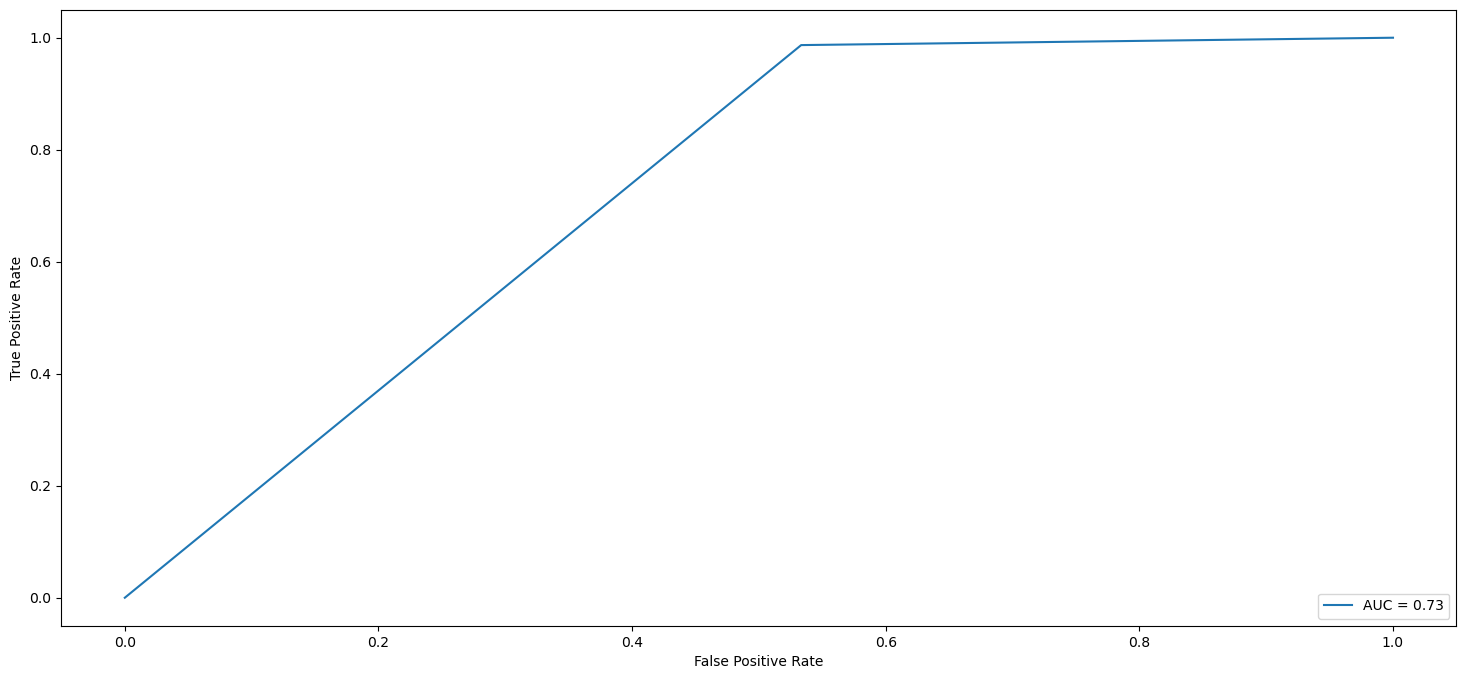

In [91]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr,tpr,thresholds=roc_curve(y_test, ypred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

# AUC = 1: Perfect model.
# AUC = 0.5: The model is no better than random guessing.
# AUC < 0.5: The model performs worse than random guessing.

In [92]:
# AUC score

from sklearn.metrics import roc_auc_score
print("AUC score: " , roc_auc_score(y_test, ypred_test))

AUC score:  0.7267543859649123


# 2. KNN

Hyper Parameter Tuning: Hyperparameter tuning is the process of optimizing the settings (hyperparameters) of a machine learning model to improve its performance. Hyperparameters are the parameters of the learning algorithm that are not learned from the data but must be specified before training.

Modelling and Evaluation

In [93]:
# Hyperparameter Tuning

estimator= KNeighborsClassifier()
param_grid= {'n_neighbors': list(range(1,50)), "p": [1,2]}
knn_grid= GridSearchCV(estimator, param_grid, scoring='accuracy', cv=6)
knn_grid.fit(X_train, y_train)

#knn with best hyperparameters
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=10, p=1)

In [94]:
#Modelling

knn_model=knn_grid.best_estimator_
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [95]:
#Predict and evaluate on train data

ypred_train=knn_model.predict(X_train)   
print("Train Accuracy: ", accuracy_score(y_train,ypred_train))

#cross validation on train data

print("CV Score: ", cross_val_score(knn_model, X_train, y_train, cv=6, scoring="accuracy").mean())

# Predict and evaluation on test data

ypred_test= knn_model.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

Train Accuracy:  0.7801418439716312
CV Score:  0.7421529175050302
Test Accuracy:  0.7735849056603774


# 3. Support Vector Machine

In [96]:
from sklearn.svm import SVC

In [97]:
# Hyperparameter Tuning

estimator= SVC()
param_grid= {'C': [0.01, 0.1,1], 'kernel': ['linear', 'rbf', 'sigmoid', 'poly']}
svm_grid= GridSearchCV(estimator, param_grid, scoring='accuracy', cv=6)
svm_grid.fit(X_train, y_train)

#SVM with best hyperparameters
svm_grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [98]:
#Modelling

svm_model=svm_grid.best_estimator_
svm_model.fit(X_train,y_train)

SVC(C=0.1, kernel='linear')

In [99]:
#Predict and evaluate on train data

ypred_train=svm_model.predict(X_train)   
print("Train Accuracy: ", accuracy_score(y_train,ypred_train))

#cross validation on train data

print("CV Score: ", cross_val_score(knn_model, X_train, y_train, cv=6, scoring="accuracy").mean())

# Predict and evaluation on test data

ypred_test= svm_model.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

Train Accuracy:  0.8085106382978723
CV Score:  0.7421529175050302
Test Accuracy:  0.839622641509434


# 4. Decision Tree Classifier|

#### First create default DT model (fully grown tree without any pruning), so that we can understand the max_depth

In [100]:
model= DecisionTreeClassifier(random_state=True)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=True)

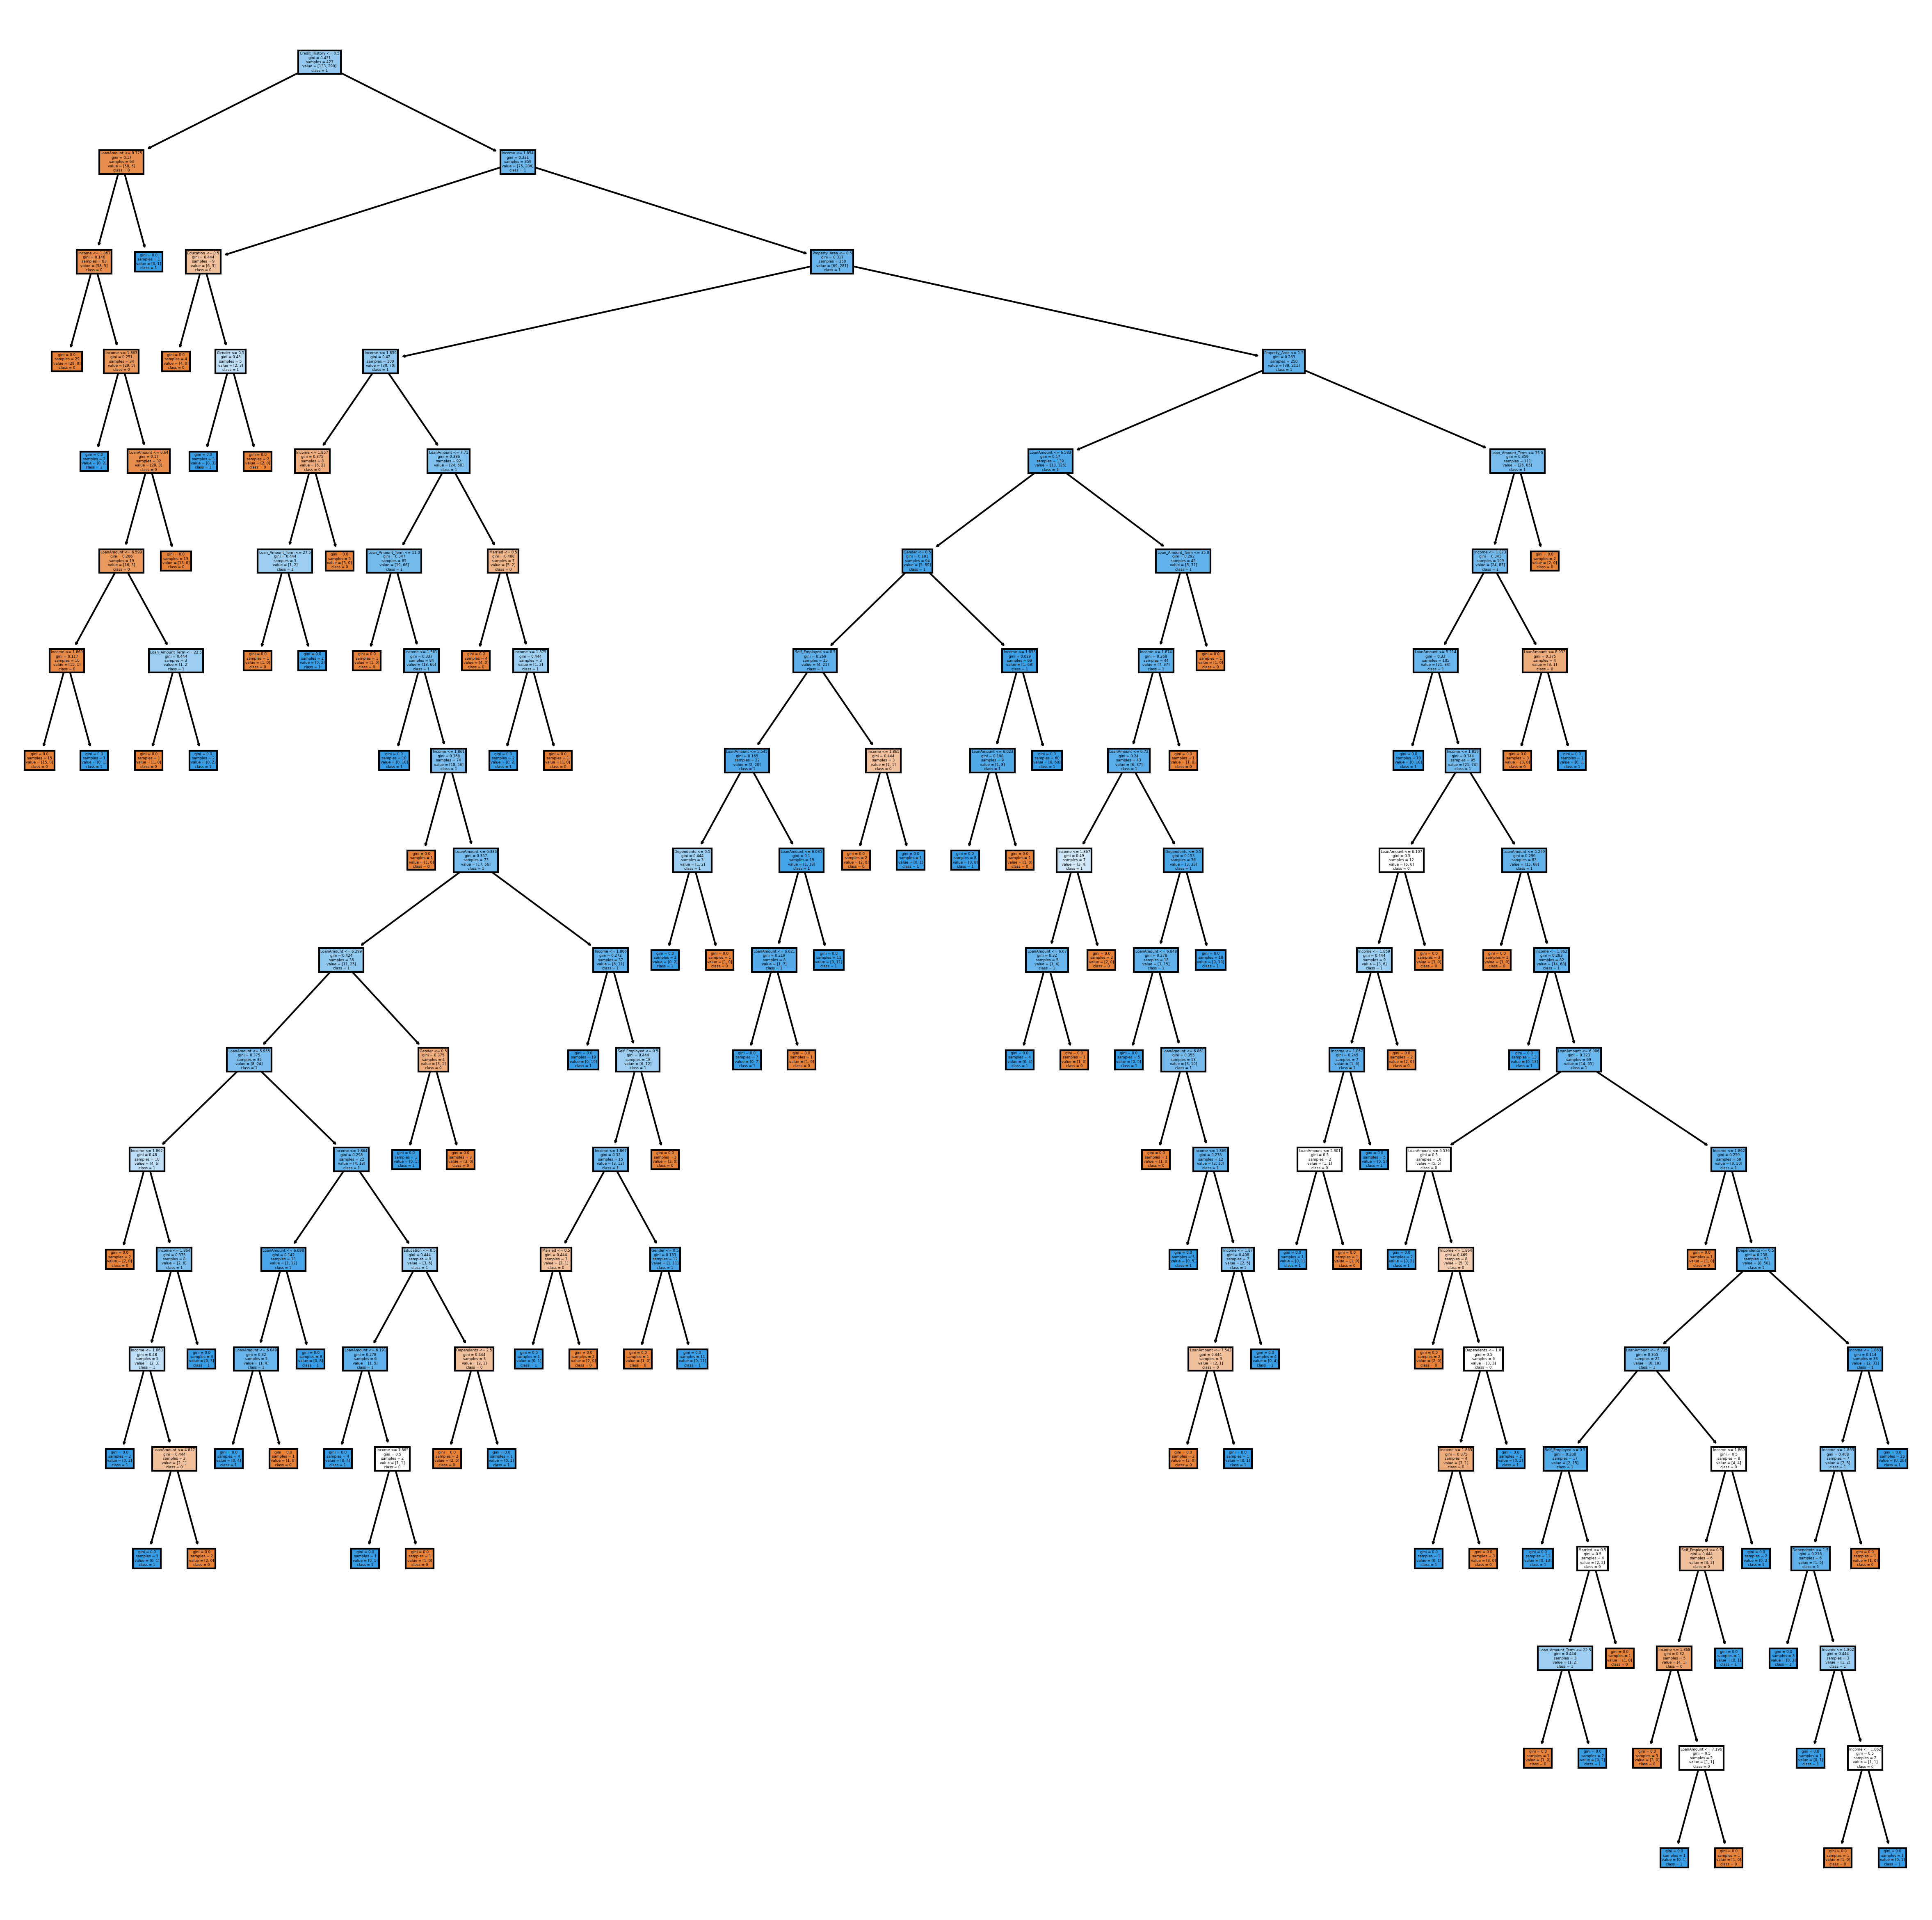

In [101]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20),dpi=300)   #dpi= dots per inch
plot_tree(model,filled=True, 
          feature_names=X_train.columns.tolist(),
          class_names=["0","1"])

plt.show()

In [133]:
#Hyperparameter tuning

estimator= DecisionTreeClassifier(random_state=True)

param_grid={"criterion": ["gini", "entropy"], "max_depth":list(range(1,16))}

dt_grid=GridSearchCV(estimator, param_grid, scoring='accuracy', cv=6)
dt_grid.fit(X_train,y_train)

dt=dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=1, random_state=True)

In [134]:
# important features

feats_dt=pd.DataFrame(data=dt.feature_importances_, index=X.columns, columns=['Importance'])

important_features_dt= feats_dt[feats_dt['Importance']>0].index.tolist()
important_features_dt

['Credit_History']

#### creating decision tree model with important parameters and important features

In [135]:
#Selecting train and test data
X_train_dt= X_train[important_features_dt]
X_test_dt= X_test[important_features_dt]

In [136]:
#Modelling

dt=dt_grid.best_estimator_
dt.fit(X_train_dt,y_train)

DecisionTreeClassifier(max_depth=1, random_state=True)

In [137]:
#Evaluation

ypred_train= dt.predict(X_train_dt)
ypred_test= dt.predict(X_test_dt)

In [138]:
print("Train Accuracy: ", accuracy_score(y_train,ypred_train))
print("CV Score: ", cross_val_score(dt, X_train_dt, y_train, cv=6, scoring="accuracy").mean())
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

Train Accuracy:  0.8085106382978723
CV Score:  0.808450704225352
Test Accuracy:  0.839622641509434


# 5. Random Forest Classifier

In [139]:
#Hyperparameter tuning

estimator= RandomForestClassifier(random_state=True)

param_grid={"n_estimators":list(range(1,51))}

rf_grid=GridSearchCV(estimator, param_grid, scoring='accuracy', cv=6)
rf_grid.fit(X_train,y_train)

rf=rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=32, random_state=True)

In [140]:
# important features

feats_rf=pd.DataFrame(data=rf.feature_importances_, index=X.columns, columns=['Importance'])

important_features_rf= feats_rf[feats_rf['Importance']>0].index.tolist()
important_features_rf

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [119]:
#Selecting train and test data
X_train_rf= X_train[important_features_rf]
X_test_rf= X_test[important_features_rf]

#Modelling

rf=rf_grid.best_estimator_
rf.fit(X_train_rf,y_train)

#Evaluation

ypred_train= rf.predict(X_train_rf)
ypred_test= rf.predict(X_test_rf)

print("Train Accuracy: ", accuracy_score(y_train,ypred_train))
print("CV Score: ", cross_val_score(dt, X_train_rf, y_train, cv=6, scoring="accuracy").mean())
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

Train Accuracy:  1.0
CV Score:  0.808450704225352
Test Accuracy:  0.8207547169811321


# 6. AdaBoost Classifier

In [120]:
#Hyperparameter tuning

estimator= AdaBoostClassifier(random_state=True)

param_grid={"n_estimators":list(range(1,51))}

ab_grid=GridSearchCV(estimator, param_grid, scoring='accuracy', cv=6)
ab_grid.fit(X_train,y_train)

ab=ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=3, random_state=True)

In [121]:
# important features

feats_ab=pd.DataFrame(data=ab.feature_importances_, index=X.columns, columns=['Importance'])

important_features_ab= feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_ab

['Credit_History', 'Property_Area', 'Income']

In [122]:
#Selecting train and test data
X_train_ab= X_train[important_features_ab]
X_test_ab= X_test[important_features_ab]

#Modelling

ab=ab_grid.best_estimator_
ab.fit(X_train_ab,y_train)

#Evaluation

ypred_train= ab.predict(X_train_ab)
ypred_test= ab.predict(X_test_ab)

print("Train Accuracy: ", accuracy_score(y_train,ypred_train))
print("CV Score: ", cross_val_score(dt, X_train_ab, y_train, cv=6, scoring="accuracy").mean())
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

Train Accuracy:  0.8203309692671394
CV Score:  0.808450704225352
Test Accuracy:  0.8113207547169812


# 7. Gradient Boost Classifier

In [123]:
#Hyperparameter tuning

estimator= GradientBoostingClassifier(random_state=True)

param_grid={"n_estimators":list(range(1,10)),
           "learning_rate": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

gb_grid=GridSearchCV(estimator, param_grid, scoring='accuracy', cv=6)
gb_grid.fit(X_train,y_train)

gb=gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.2, n_estimators=5, random_state=True)

In [124]:
# important features

feats_gb=pd.DataFrame(data=gb.feature_importances_, index=X.columns, columns=['Importance'])

important_features_gb= feats_gb[feats_gb['Importance']>0].index.tolist()
important_features_gb

['Gender',
 'Married',
 'Education',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [125]:
#Selecting train and test data
X_train_gb= X_train[important_features_gb]
X_test_gb= X_test[important_features_gb]

#Modelling

gb=gb_grid.best_estimator_
gb.fit(X_train_gb,y_train)

#Evaluation

ypred_train= gb.predict(X_train_gb)
ypred_test= gb.predict(X_test_gb)

print("Train Accuracy: ", accuracy_score(y_train,ypred_train))
print("CV Score: ", cross_val_score(dt, X_train_gb, y_train, cv=6, scoring="accuracy").mean())
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

Train Accuracy:  0.817966903073286
CV Score:  0.808450704225352
Test Accuracy:  0.8301886792452831


# 8. XGBoost Classifier

In [127]:
#Hyperparameter tuning

estimator= XGBClassifier()

param_grid={"n_estimators":[10, 20, 40, 100],
            "max_depth":[3,4,5],
            "gamma": [0,0.15,0.3,0.5,1]}

xgb_grid=GridSearchCV(estimator, param_grid, scoring='accuracy', cv=6)
xgb_grid.fit(X_train,y_train)

xgb=xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [128]:
# important features

feats_xgb=pd.DataFrame(data=xgb.feature_importances_, index=X.columns, columns=['Importance'])

important_features_xgb= feats_xgb[feats_xgb['Importance']>0].index.tolist()
important_features_xgb

['Married',
 'Dependents',
 'Education',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [130]:
#Selecting train and test data
X_train_xgb= X_train[important_features_xgb]
X_test_xgb= X_test[important_features_xgb]

#Modelling

xgb=xgb_grid.best_estimator_
xgb.fit(X_train_xgb,y_train)

#Evaluation

ypred_train= xgb.predict(X_train_xgb)
ypred_test= xgb.predict(X_test_xgb)

print("Train Accuracy: ", accuracy_score(y_train,ypred_train))
print("CV Score: ", cross_val_score(dt, X_train_xgb, y_train, cv=6, scoring="accuracy").mean())
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

Train Accuracy:  0.8274231678486997
CV Score:  0.808450704225352
Test Accuracy:  0.8207547169811321


# Save the best model

In [141]:
from joblib import dump
dump(dt, 'loan.joblib')

['loan.joblib']

# Predict on new data

In [142]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,0,0,6.243267,30.0,1,0,0,1.864967
2,1,1,0,0,1,5.202610,30.0,1,2,1,1.856556
3,1,1,0,1,0,6.138816,30.0,1,2,1,1.862802
4,1,0,0,0,0,6.401083,30.0,1,2,1,1.864819
5,1,1,2,0,1,7.481930,30.0,1,2,1,1.868932


In [ ]:
# from original data columns, we fill new data and predict

In [156]:
input_data={'Loan_ID':'LP002991',
            'Gender':'Male',
            'Married':'No',
            'Dependents':1,
            'Education':'Graduate',
            'Self_Employed':'yes',
            'ApplicantIncome':1000,
            'CoapplicantIncome':0,
            'LoanAmount':100,
            'Loan_Amount_Term':240,
            'Credit_History':'bad',
            'Property_Area':'urban'}

In [157]:
data=pd.DataFrame(input_data, index=[0])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002991,Male,No,1,Graduate,yes,1000,0,100,240,bad,urban


#### Apply data preprocessing on unknown data

In [158]:
data.drop(columns=['Loan_ID'], inplace= True)
data['Income']= data['ApplicantIncome']+ data['CoapplicantIncome']
data.drop(columns=['ApplicantIncome','CoapplicantIncome'], inplace= True)

data['Dependents']=data['Dependents'].fillna(0)
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data= data.dropna(subset=['Income', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])

data['Dependents']= data['Dependents'].astype('int')
data['Loan_Amount_Term']= data['Loan_Amount_Term'].astype('int')

data['Gender']= data['Gender'].replace({'Male': 1, 'Female':0})
data['Married']= data['Married'].replace({'Yes': 1, 'No':0})
data['Education']= data['Education'].replace({'Not Graduate': 1, 'Graduate':0})
data['Self_Employed']= data['Self_Employed'].replace({'Yes': 1, 'No':0})
data['Property_Area']= data['Property_Area'].replace({'Urban': 2, 'Semiurban': 1, 'Rural':0})
data['Credit_History']= data['Credit_History'].replace({'good': 1, 'bad':0})
# data['Loan_Status']= we do not have this col, since we have to predict it

data['Loan_Amount_Term']= data['Loan_Amount_Term']/12

X_new= data

In [159]:
#select important features of your best model
X_new= X_new[important_features_dt]

#Apply and predict using your best model
dt.predict(X_new)

array([0])

In [ ]:
# 0 means 'No'